In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
df = pd.read_excel('/Users/Owner/OneDrive/Desktop/PGA_Final.xlsx')
del df['Unnamed: 0']
df

,PLAYER NAME,ROUNDS,DISTANCE,TOURNAMENT,ROUND,HOLE,COURSE,YEAR
0,Lee Westwood,65,425,Byron Nelson,3,8,894,2021
1,Cameron Champ,79,424,Sentry,4,7,656,2021
2,Connor Syme,2,423,U.S. Open(2020),2,4,891,2021
3,Dustin Johnson,75,419,U.S. Open(2020),4,9,891,2021
4,Bryson DeChambeau,83,414,Sentry,2,12,656,2021
...,...,...,...,...,...,...,...,...
5317,Lion Kim,2,273,Masters,2,1,14,2011
5318,Michael Campbell,2,272,U.S. Open,2,1,24,2011
5319,Beau Hossler,2,270,U.S. Open,1,1,24,2011
5320,Larry Mize,2,269,Masters,2,1,14,2011


In [25]:
df_numerical = df._get_numeric_data()
df_numerical.describe()

,ROUNDS,DISTANCE,ROUND,HOLE,COURSE,YEAR
count,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000
mean,33.889515,346.966366,2.039835,8.883127,499.229989,2016.454904
std,35.275342,31.728626,1.040033,5.835097,313.659488,3.294014
min,1.000000,243.000000,1.000000,1.000000,4.000000,2011.000000
25%,2.000000,325.000000,1.000000,3.000000,104.000000,2013.000000
50%,13.000000,350.000000,2.000000,9.000000,656.000000,2017.000000
75%,70.000000,369.000000,3.000000,14.000000,752.000000,2019.000000
max,127.000000,463.000000,4.000000,18.000000,902.000000,2021.000000


In [7]:
#data points in each year
years = df.groupby('YEAR')['YEAR'].count()
years

YEAR
2011    579
2012    580
2013    201
2014    194
2015    202
2016    592
2017    610
2018    626
2019    619
2020    485
2021    634
Name: YEAR, dtype: int64

Text(0.5, 1.0, 'Longest Drive')

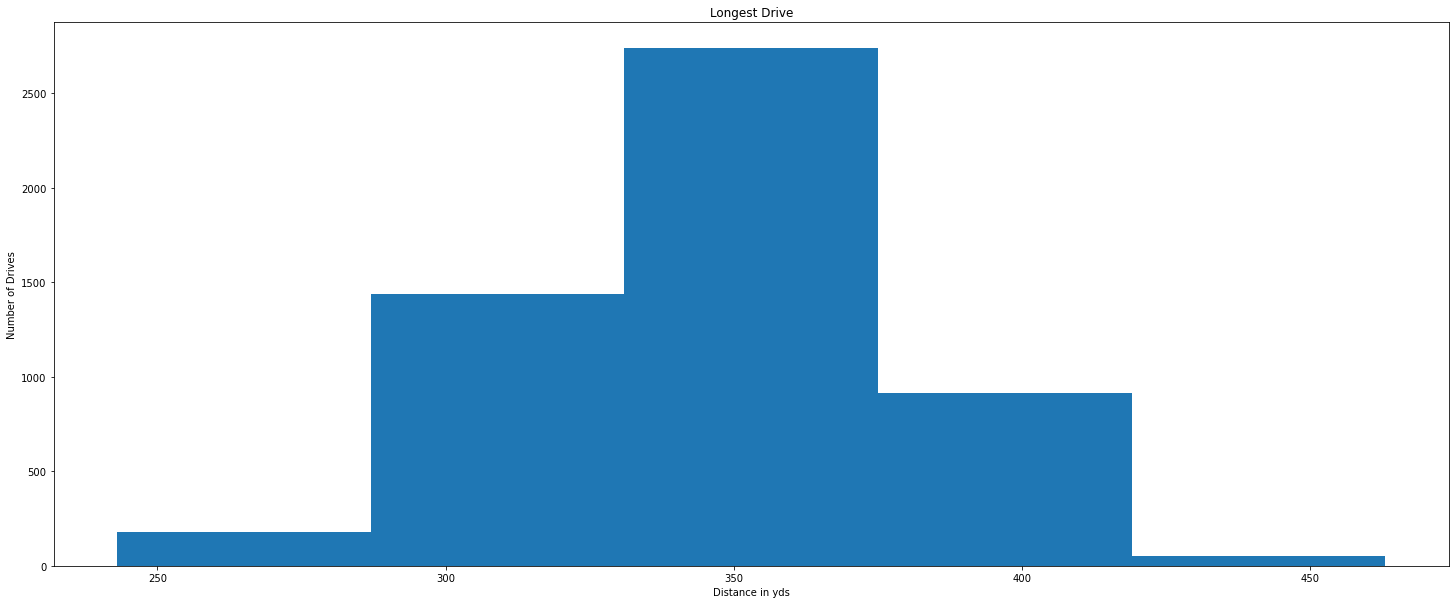

In [5]:
#avg distance distribution
distance=df['DISTANCE']
distance_array = np.array(distance)
plt.figure(figsize = (25,10))
plt.hist(distance_array, bins=5)
plt.xlabel('Distance in yds')
plt.ylabel('Number of Drives')
plt.title('Longest Drive')

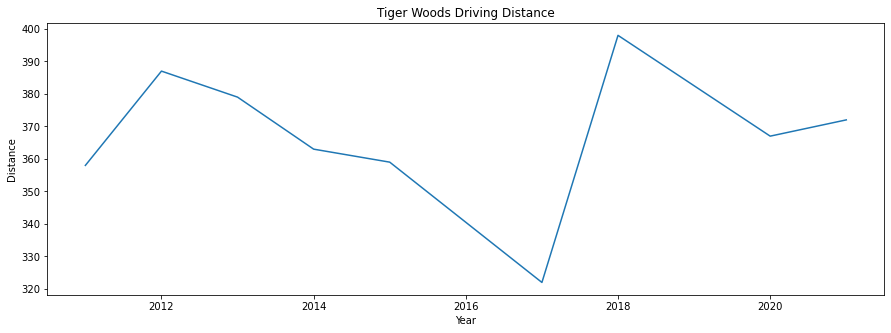

In [84]:
#average drive distance for a player over time
def playername_(a):
    player=df[df['PLAYER NAME']==a]
    dist= player.groupby('YEAR')['DISTANCE'].mean()
    years=np.unique(player['YEAR'])
    plt.figure(figsize=(15,5))
    plt.xlabel('Year')
    plt.ylabel('Distance')
    plt.title(a + ' Driving Distance')
    return plt.plot(years,dist)

playername_('Tiger Woods')

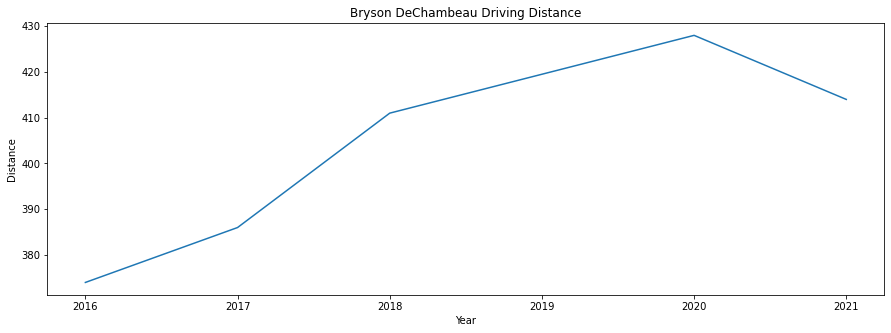

In [85]:
playername_('Bryson DeChambeau')

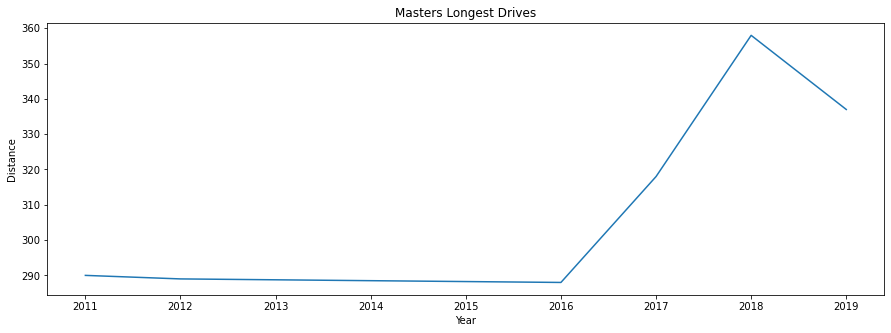

In [83]:
#max drive over time at a given tournament
def tournament(b):
    tourn=df[df['TOURNAMENT']==b]
    tourn_dist=tourn.groupby('YEAR')['DISTANCE'].max()
    years=np.unique(tourn['YEAR'])
    plt.figure(figsize=(15,5))
    plt.title(b + ' Longest Drives')
    plt.xlabel('Year')
    plt.ylabel('Distance')
    return plt.plot(years,tourn_dist)
tournament('Masters')

In [45]:
#function to find the average drive of a given player
def mean_function(a):
    players_dis=df[df['PLAYER NAME']==a]
    mean_players=round(players_dis['DISTANCE'].mean(),2)
    return mean_players

mean_function('Tiger Woods')

367.22

In [57]:
#average driving distance by each player in past 10 years
a=[]
for i in df['PLAYER NAME']:
    a.append(i)
a=pd.unique(a)

b=[]
bb=[]

for x in a:
    players=df[df['PLAYER NAME']== x]
    player_dist_max=players['DISTANCE'].max()
    player_dist_min=players['DISTANCE'].min()
    b.append(player_dist_min)
    bb.append(player_dist_max)


dist_min = dict(zip(a,b))
dist_max = dict(zip(a,bb))

#finding the min, max and avg longest drive for a given player
def minmaxavg(c):
    output=[]
    test = ['min','max','avg']
    output.append(dist_min[c])
    output.append(dist_max[c])
    
    print(dict(zip(test,output)))
minmaxavg('Tiger Woods')

{'min': 322, 'max': 398}


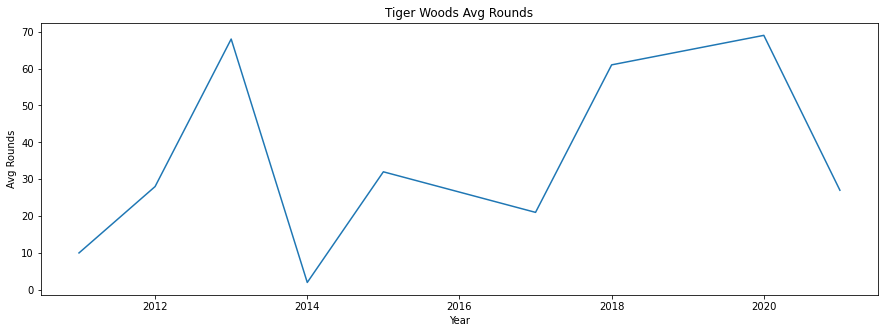

In [81]:
tw=df[df['PLAYER NAME']=='Tiger Woods']
tiger=tw.groupby('YEAR')['ROUNDS'].mean()
tw_years=pd.unique(tw['YEAR'])
plt.figure(figsize=(15,5))
plt.title('Tiger Woods Avg Rounds')
plt.xlabel('Year')
plt.ylabel('Avg Rounds')
plt.plot(tw_years,tiger)

In [26]:
#creating dict for each player and their average drive
mean_dict={}
for i in df['PLAYER NAME'].unique():
    players_name = df[df['PLAYER NAME']==i]
    mean_dict[i] = mean_function(i)


In [34]:
#grouped by tournament and player
df.groupby(by=['TOURNAMENT','PLAYER NAME']).mean()

ROUNDS  DISTANCE  ROUND  HOLE  COURSE  \
TOURNAMENT   PLAYER NAME                                                    
3M Open          Beau Hossler         87.0     372.0    1.0   9.0   883.0   
                 Brian Dwyer           2.0     313.0    1.0   5.0   883.0   
                 Charlie Danielson    14.0     318.0    1.0  15.0   883.0   
                 Craig Brischke        2.0     315.0    2.0   1.0   883.0   
                 Mark Baldwin          2.0     352.0    1.0  15.0   883.0   
...                                    ...       ...    ...   ...     ...   
the Memorial Vaughn Taylor            61.0     341.0    1.0  17.0    23.0   
             William McGirt            4.0     354.0    1.0  17.0    23.0   
             Wyndham Clark            65.0     399.0    2.0  17.0    23.0   
             Xinjun Zhang             77.0     358.0    3.0  17.0    23.0   
             Zach Johnson             61.0     352.0    4.0   2.0    23.0   

                                      YEAR  
TOURNAMENT   PLAYER NAME                    
3M Open          Beau Hossler       2019.0  
                 Brian Dwyer        2019.0  
                 Charlie Danielson  2019.0  
                 Craig Brischke     2019.0  
                 Mark Baldwin       2019.0  
...                                    ...  
the Memorial Vaughn Taylor          2020.0  
             William McGirt         2020.0  
             Wyndham Clark          2020.0  
             Xinjun Zhang           2020.0  
             Zach Johnson           2020.0  

[4795 rows x 6 columns]

Findings

Tiger Woods
-we can see that Tiger's driving distance decreased dramatically from 2012 to 2016. This 4 year period was when Tiger started to cool off.
however we can see after 2016, Tiger's average driving distance increased drastically right before he won the Masters in 2019

-We can also see that Tiger's average rounds played per year started to decrease in 2013 and stayed low until 2018. These period of time was when Tiger had back
issues. However, right before Tiger won the masters in 2019 we can see he started to play more each year